
Additional resource: 
https://github.com/rasbt/machine-learning-book/blob/92e2320709071b4dcc82a99552aec145536cfbcd/ch02/ch02.ipynb

In [ ]:
import numpy as np
import random

# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

from sklearn import preprocessing, datasets
from sklearn.model_selection import train_test_split

### Math notation
Let j represent the j-th features (m total).  Let i represent the i-th observation (n total). $\eta$ is the learning rate.


``Net input function``: 
$z= w_{0} \cdot 1 + w_{2} \cdot x_{1} + w_{2} \cdot x_{2} + ... + w_{m} \cdot x_{m}$

``Threshold function``:

$$
\tau(z)  = 
\begin{cases}
1,  \text {if } z \geq 0,\\
-1, \text{ otherwise}
\end{cases}
$$

`` Compute error``: 
$(y\_actual_{i} - \tau(z_{i}))$, where $\tau(z_{i})$ is $y\_pred_{i}$

``Update weights``:

$$w_{j} := w_{j} + \Delta w_{j}, \forall j \in {1,...,m}$$

$$\Delta w_{j} = \eta(y\_actual_{i} - \tau(z_{i}))\cdot x_{i,j}, \forall j \in {1,...,m}, \forall i \in {1,...,n}$$




### Load the data -- Iris dataset

In [158]:
# We'll use the Iris dataset for illustrartaion https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
data = datasets.load_iris()
X = data.data[:100,[0,2]] # we'll use 2 features so we can plot the datapoints
y = data.target[:100] # we'll use 2 of the classes only

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

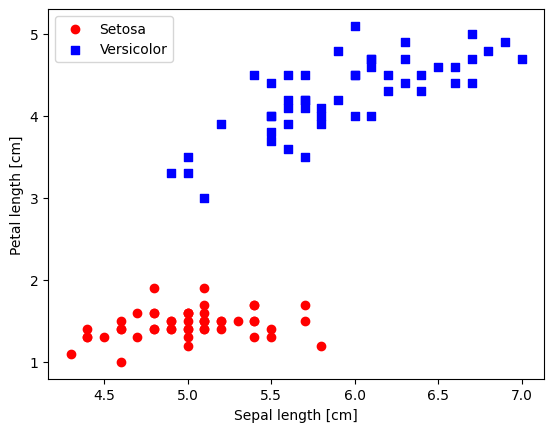

In [159]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


### Perceptron from scratch

In [160]:
# Step 1: initalize hyperparameters
eta =  0.1 #
n_iter = 10
random_state = 1
m = X.shape[1]

# Step 2: initalize weights (to small random numbers)
rgen = np.random.RandomState(random_state)
w_ = rgen.normal(loc=0.0, scale=0.01, size= 1 + m)

errors_ = [] #initalize errors list

# Step 3: compute net input, update weights, track error (# misclassifications)
def fit(X, y):
    for iter_ in range(n_iter):
        errors = 0
        # compute the net input function
        net_input = np.dot(X, w_[1:]) + w_[0]

        # compute the threshold (unit step) function; this gives us y_pred
        y_pred = np.where(net_input >= 0.0, 1, 0)

        # iterate through all i in X,y
        for idx, (xi, y_actual) in enumerate(zip(X, y)):
            # compute error
            error = y_actual - y_pred[idx]
            
            # update weights (notice how weights are updated after each training example!)
            delta_w = eta * error
            w_[1:] += delta_w * xi
            w_[0] += delta_w 
            
            # update errors
            errors += int(delta_w != 0.0)
        errors_.append(errors)
        
    return errors_

def predict(X):
    net_input = np.dot(X, w_[1:]) + w_[0]
    y_pred = np.where(net_input >= 0.0, 1,0)
    
    return y_pred

### Percetron training on Iris


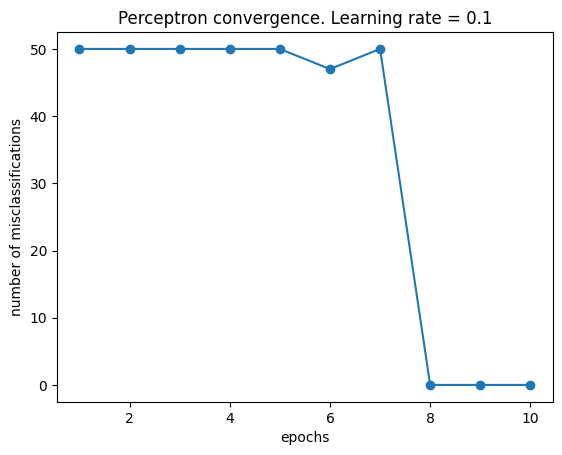

In [161]:
errors_ = fit (X,y)
y_pred = predict(X)

# plot cost
#plt.plot((range(1, len(errors_) + 1)), errors_, marker='o');
plt.plot(range(1, len(errors_) + 1), errors_, marker='o')
plt.xlabel('epochs');
plt.ylabel('number of misclassifications'); # number of times y_actual != y_pred
plt.title('Perceptron convergence. Learning rate = ' + str(eta));